# Prueba de algunos modelos de clasificacion

Corremos los modelos y comparamos las metricas

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",40)
sns.set(style="whitegrid")

In [2]:
df = pd.read_csv("path_datos_entrenamiento" , sep = "|")

### Skcit learn decision tree

In [4]:
#train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(['SUSCRIBER_KEY', 'target'],axis=1), 
                                                    df['target'], test_size=0.30, 
                                                    random_state=101)


In [4]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [5]:
predictions = dtree.predict(X_test)

In [6]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84    212281
           1       0.56      0.57      0.56     77921

    accuracy                           0.76    290202
   macro avg       0.70      0.70      0.70    290202
weighted avg       0.77      0.76      0.76    290202

[[176972  35309]
 [ 33410  44511]]


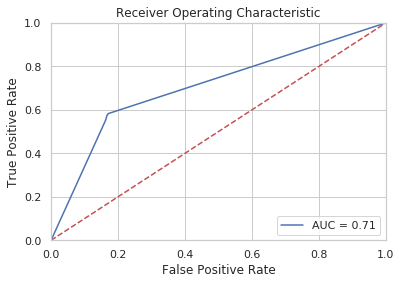

In [7]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = dtree.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Scikit learn Random Forest

In [5]:
# now with random forest

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [6]:
rfc_pred = rfc.predict(X_test)

In [7]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88    190508
           1       0.70      0.62      0.66     70674

    accuracy                           0.82    261182
   macro avg       0.78      0.76      0.77    261182
weighted avg       0.82      0.82      0.82    261182

[[171850  18658]
 [ 27054  43620]]


[[171850  18658]
 [ 27054  43620]]
  Random Forest

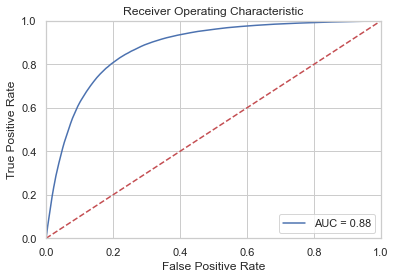

In [8]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [12]:
list(zip(df.columns[1:-1],rfc.feature_importances_))

[('VALUE_SEGMENT', 0.023837294971651213),
 ('PREP_RECH_Q_EVT_X1', 0.06779551652839204),
 ('PREP_RECH_Q_EVT_X2', 0.012977255283975787),
 ('PREP_RECH_Q_EVT_X3', 0.010477323966530663),
 ('PREP_RECH_AMT_X1', 0.06372082194291709),
 ('PREP_RECH_AMT_X2', 0.029331266531264336),
 ('PREP_RECH_AMT_X3', 0.01951394168715286),
 ('TRD_M1', 0.036622849723566366),
 ('TRD_M2', 0.033070585844850856),
 ('TRD_M3', 0.03611864215782936),
 ('PACK_DATA_Q_X1', 0.016507553690731445),
 ('PACK_DATA_Q_X2', 0.005479223584614694),
 ('PACK_DATA_Q_X3', 0.0059271411923804375),
 ('PACK_DATA_AMT_X1', 0.029910923074405616),
 ('PACK_DATA_AMT_X2', 0.012353887461227439),
 ('PACK_DATA_AMT_X3', 0.013804211568771712),
 ('DATA_EXP_MEAN', 0.0351478159764745),
 ('PREP_RECH_AMT_REL_X1', 0.0711449249475402),
 ('PREP_RECH_AMT_REL_X2', 0.019220829450309573),
 ('PREP_RECH_AMT_REL_X3', 0.02276666582392059),
 ('PACK_DATA_AMT_REL_X1', 0.017968594594666633),
 ('PACK_DATA_AMT_REL_X2', 0.012630853975245462),
 ('PACK_DATA_AMT_REL_X3', 0.012736

### XGBoost

In [13]:
import xgboost as xgb

In [14]:
# Separate the target variable and rest of the variables using .iloc to subset the data.
X,y = df.iloc[:,1:-1],df.iloc[:,-1]

In [15]:
#Now you will convert the dataset into an optimized data structure 
#called Dmatrix that XGBoost supports and gives it acclaimed performance and efficiency gains
#data_dmatrix = xgb.DMatrix(data=X,label=y)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [17]:
xg_reg = xgb.XGBClassifier()

In [18]:
xg_reg.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [19]:
XGB_preds = xg_reg.predict(X_test)

In [20]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,XGB_preds))
print(confusion_matrix(y_test,XGB_preds))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89    212281
           1       0.70      0.65      0.68     77921

    accuracy                           0.83    290202
   macro avg       0.79      0.77      0.78    290202
weighted avg       0.83      0.83      0.83    290202

[[190574  21707]
 [ 27161  50760]]


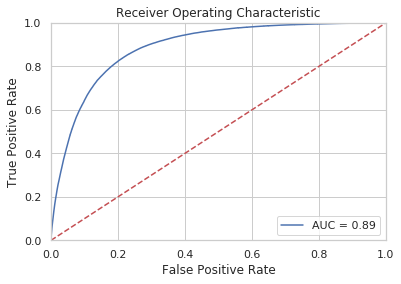

In [21]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = xg_reg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()